# Import libararies


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# load database

In [3]:
df = pd.read_csv('D:\\jn\\data-anlytics-project\\eda\\retail_sales_dataset.csv')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,16-05-2023,CUST996,Male,62,Clothing,1,50,50
996,997,17-11-2023,CUST997,Male,52,Beauty,3,30,90
997,998,29-10-2023,CUST998,Female,23,Beauty,4,25,100
998,999,05-12-2023,CUST999,Female,36,Electronics,3,50,150


# 1. Data Loading and Cleaning

# Data View

In [48]:
# Display basic information 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


#  Duplication values Check

In [49]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


#  Check for missing values

In [50]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


#  Display the first few rows to understand the structure

In [51]:

# Display the first few rows to understand the structure
print(df.head())


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  24-11-2023     CUST001    Male   34           Beauty   
1               2  27-02-2023     CUST002  Female   26         Clothing   
2               3  13-01-2023     CUST003    Male   50      Electronics   
3               4  21-05-2023     CUST004    Male   37         Clothing   
4               5  06-05-2023     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


# 2. Descriptive Statistics

In [52]:
# Basic statistics for numeric columns
statistics = df.describe()

# Calculate additional statistics if needed
mean_sales = df['Total Amount'].mean()
median_sales = df['Total Amount'].median()
mode_sales = df['Total Amount'].mode()[0]  # Mode might have multiple values
std_dev_sales = df['Total Amount'].std()

print(f"Mean Sales: {mean_sales}")
print(f"Median Sales: {median_sales}")
print(f"Mode Sales: {mode_sales}")
print(f"Standard Deviation of Sales: {std_dev_sales}")


Mean Sales: 456.0
Median Sales: 135.0
Mode Sales: 50
Standard Deviation of Sales: 559.997631555123


# 3. Time Series Analysis

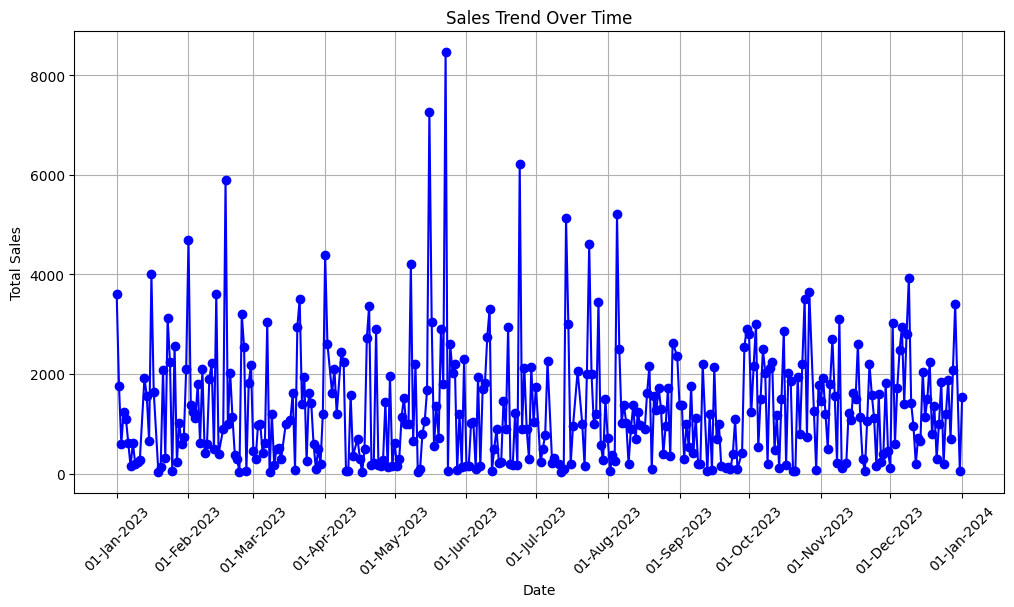

In [59]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Aggregate sales by date
sales_over_time = df.groupby('Date')['Total Amount'].sum().reset_index()

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['Date'], sales_over_time['Total Amount'], marker='o', linestyle='-', color='b')

# Set title and labels
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')

# Improve date formatting on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))  # Format dates as 'day-month-year'
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to one per month

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.show()


# 4. Customer and Product Analysis

# Customer Demographics

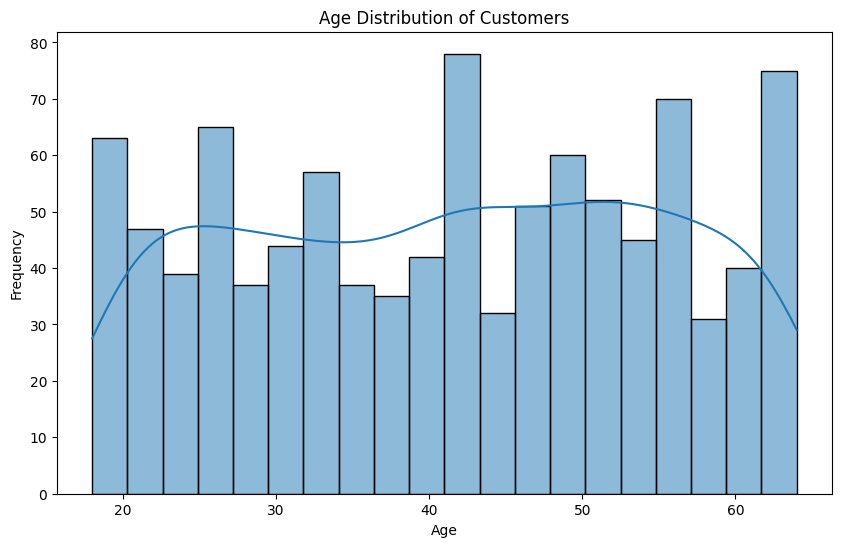

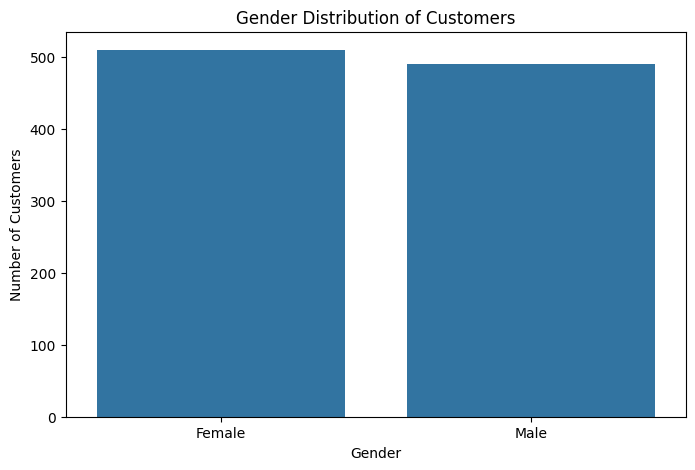

In [63]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender distribution
gender_distribution = df['Gender'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()


#  Descriptive Statistics

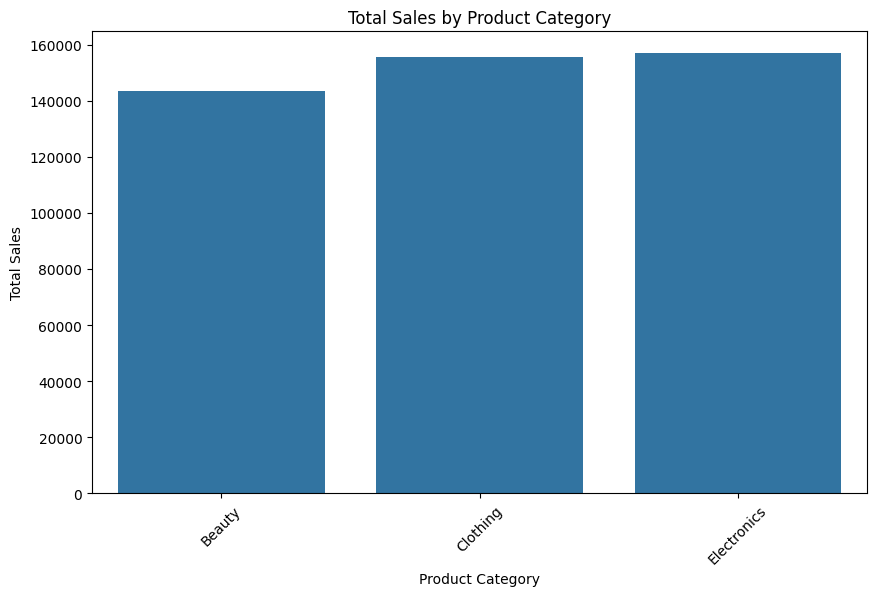

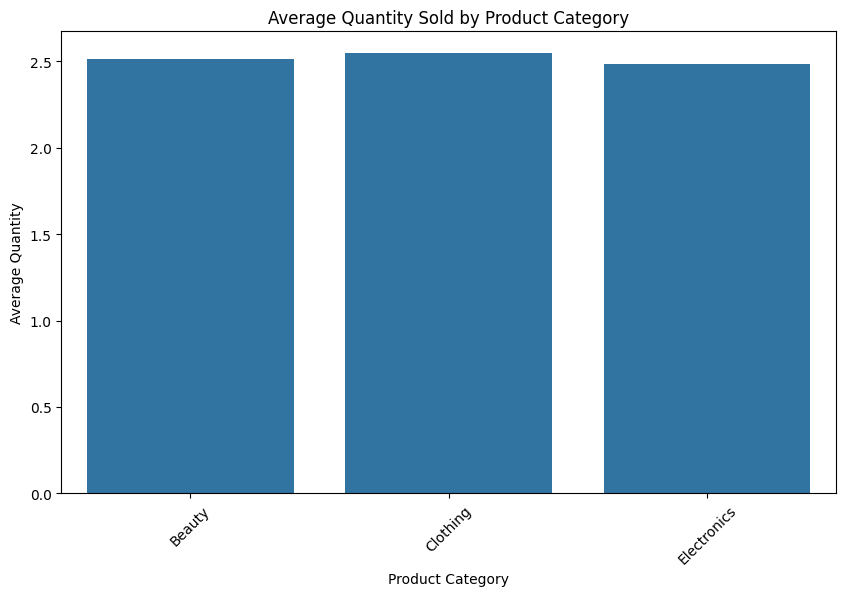

In [64]:
# Sales by Product Category
sales_by_category = df.groupby('Product Category')['Total Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_category, x='Product Category', y='Total Amount')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Average quantity sold by product category
avg_quantity_by_category = df.groupby('Product Category')['Quantity'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_quantity_by_category, x='Product Category', y='Quantity')
plt.title('Average Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Quantity')
plt.xticks(rotation=45)
plt.show()


# Visualization

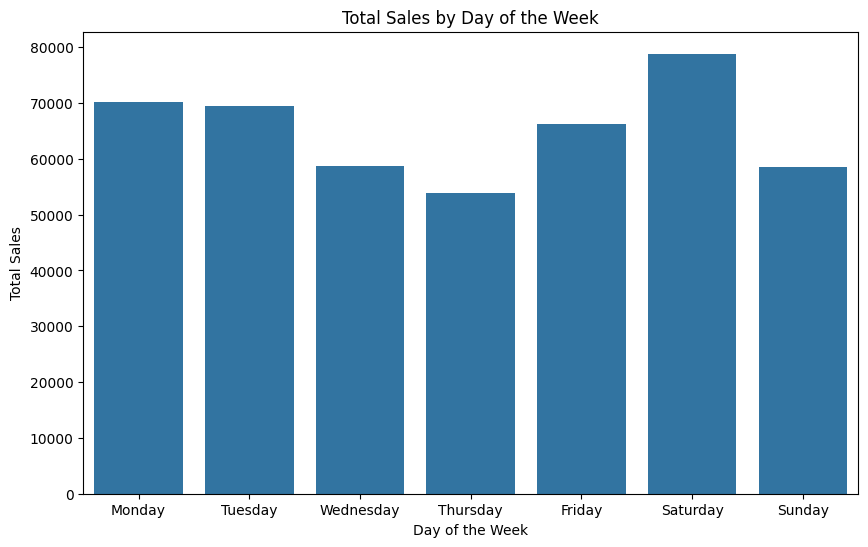

In [69]:
# Create a new column for the day of the week
df['Day of Week'] = df['Date'].dt.day_name()

sales_by_day = df.groupby('Day of Week')['Total Amount'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values)
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()



  # Recommendations

Inventory Management:

Increase stock for products in categories that show consistent high demand.
Consider reducing inventory for categories with low sales volume.
Targeted Marketing:

Develop marketing campaigns tailored to the most active customer demographics (e.g., age group, gender).
Offer promotions on slower sales days to boost overall sales.
Customer Retention:

Analyze the purchasing patterns of repeat customers and create loyalty programs to encourage repeat business.
Personalize marketing efforts based on customer purchase history and preferences.
Sales Optimization:

Use time series forecasting techniques to predict future sales trends and adjust sales strategies accordingly.
Consider dynamic pricing strategies to optimize sales during peak and off-peak times.